# Spacematrix morphotypes

Based on `mxi`, `fsi` and `l` values clustering

In [10]:
import pandas as pd

blocks_gdf = pd.read_pickle('./../../data/saint_petersburg/blocks.pickle')

In [11]:
from blocksnet.analysis.indicators import calculate_density_indicators 

density_df = calculate_density_indicators(blocks_gdf)
density_df.head()

,site_area,footprint_area,build_floor_area,living_area,non_living_area,fsi,gsi,mxi,l,osr,share_living,share_non_living
0,0.032316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,inf,NaN,NaN
1,137101.088247,69.018103,69.018103,0.000000,69.018103,0.000503,0.000503,0.000000,1.000000,1985.451134,0.000000,1.000000
2,95239.084434,5853.863274,6106.759644,4197.188633,1909.571011,0.064120,0.061465,0.687302,1.043202,14.637095,0.716995,0.326207
3,125919.330984,4214.828165,4375.483259,3033.795607,1341.687653,0.034748,0.033472,0.693362,1.038117,27.815100,0.719791,0.318326
4,169860.164494,13392.846325,31242.324144,20860.965881,10381.358263,0.183930,0.078846,0.667715,2.332762,5.008184,1.557620,0.775142


In [12]:
from blocksnet.analysis.morphotypes import get_spacematrix_morphotypes

spacematrix_df, clusters_df = get_spacematrix_morphotypes(density_df)

Every block is labeled with `cluster` number and a `morphotype`

In [13]:
spacematrix_df.head()

,l,fsi,mxi,cluster,morphotype
0,0.000000,0.000000,0.000000,NaN,NaN
1,1.000000,0.000503,0.000000,2.0,low-rise low-density non-residential
2,1.043202,0.064120,0.687302,4.0,low-rise low-density residential
3,1.038117,0.034748,0.693362,4.0,low-rise low-density residential
4,2.332762,0.183930,0.667715,4.0,low-rise low-density residential


Clusters `DataFrame` describes median values of `l`, `fsi` and `mxi` for each cluster

In [14]:
clusters_df.head()

,l,fsi,mxi,l_interpretation,fsi_interpretation,mxi_interpretation,morphotype
cluster,,,,,,,
0,2.657367,0.758933,0.000592,low-rise,low-density,non-residential,low-rise low-density non-residential
1,1.222716,0.096095,0.420762,low-rise,low-density,mixed-use,low-rise low-density mixed-use
2,1.034454,0.080210,0.000000,low-rise,low-density,non-residential,low-rise low-density non-residential
3,9.685619,1.521034,0.601516,high-mid-rise,None,residential,high-mid-rise residential
4,1.128436,0.079844,0.698272,low-rise,low-density,residential,low-rise low-density residential


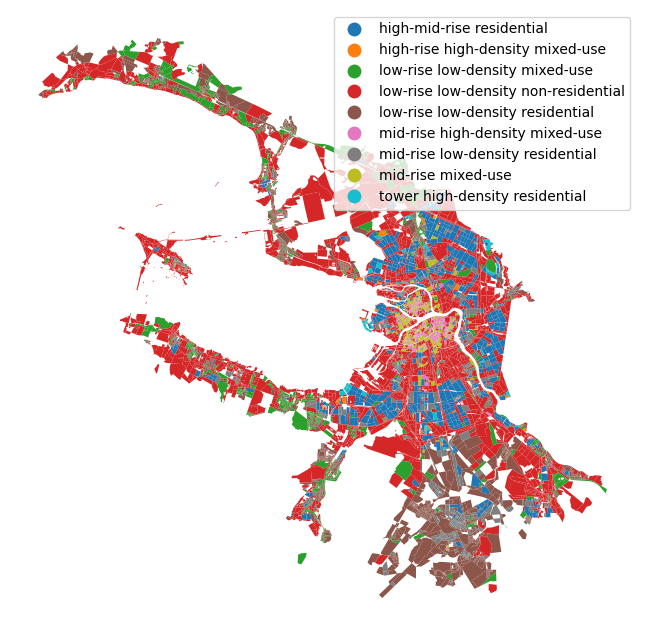

In [15]:
blocks_gdf[['geometry']].join(spacematrix_df).plot(column='morphotype', legend=True, figsize=(10,8)).set_axis_off()